<a href="https://colab.research.google.com/github/kairi812/Machine-Learning-Beginners/blob/main/clustering_evaluate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install mglearn
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.datasets import make_moons
from sklearn.metrics.cluster import adjusted_rand_score

     |████████████████████████████████| 540 kB 7.0 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=9925778b54abab07e677049ed67e3aa7c63d916a67078c8b56cbbacd6fd38ce6
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


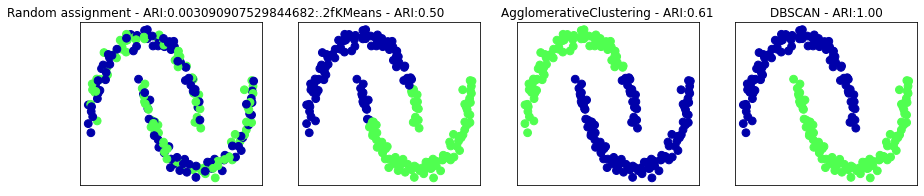

In [3]:
from numpy import random
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

# 利用するアルゴリズムリストを作成
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# プロット
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI:{}:.2f".format(adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
  clusters = algorithm.fit_predict(X_scaled)
  ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
  ax.set_title("{} - ARI:{:.2f}".format(algorithm.__class__.__name__, adjusted_rand_score(y, clusters)))

In [4]:
from sklearn.metrics import accuracy_score

cluster1 = [0, 0, 1, 1, 0]
cluster2 = [1, 1, 0, 0, 1]

print("Accuracy: {:2f}".format(accuracy_score(cluster1, cluster2)))
print("ARI: {:2f}".format(adjusted_rand_score(cluster1, cluster2)))

Accuracy: 0.000000
ARI: 1.000000


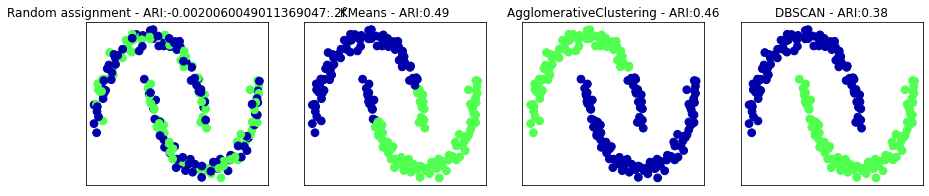

In [5]:
from sklearn.metrics.cluster import silhouette_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

# 利用するアルゴリズムリストを作成
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# プロット
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI:{}:.2f".format(silhouette_score(X_scaled, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
  clusters = algorithm.fit_predict(X_scaled)
  ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
  ax.set_title("{} - ARI:{:.2f}".format(algorithm.__class__.__name__, silhouette_score(X_scaled, clusters)))

In [26]:
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
  mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people / 255.

pca = PCA(n_components=100, whiten=True, random_state=0)
pca.fit_transform(X_people)
X_pca = pca.transform(X_people)
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1]


In [27]:
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1]


In [28]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1  0]


In [29]:
print("Number of points per cluster: {}".format(np.bincount(labels+1)))

Number of points per cluster: [  32 2031]


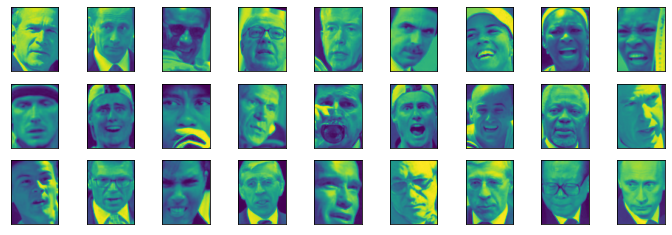

In [30]:
noise = X_people[labels==-1]

fig, axes = plt.subplots(3, 9, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(12, 4))
image_shape = people.images[0].shape

for image, ax in zip(noise, axes.ravel()):
  ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

In [31]:
for eps in [1, 3, 5, 7, 9, 11, 13]:
  print("\neps={}".format(eps))
  dbscan = DBSCAN(eps=eps, min_samples=3)
  labels = dbscan.fit_predict(X_pca)
  print("Clusters present: {}".format(np.unique(labels)))
  print("Cluster sizes: {}".format(np.bincount(labels+1)))


eps=1
Clusters present: [-1]
Cluster sizes: [2063]

eps=3
Clusters present: [-1]
Cluster sizes: [2063]

eps=5
Clusters present: [-1]
Cluster sizes: [2063]

eps=7
Clusters present: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12]
Cluster sizes: [2004    3   14    7    4    3    3    4    4    3    3    5    3    3]

eps=9
Clusters present: [-1  0  1  2]
Cluster sizes: [1307  750    3    3]

eps=11
Clusters present: [-1  0]
Cluster sizes: [ 413 1650]

eps=13
Clusters present: [-1  0]
Cluster sizes: [ 120 1943]


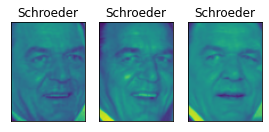

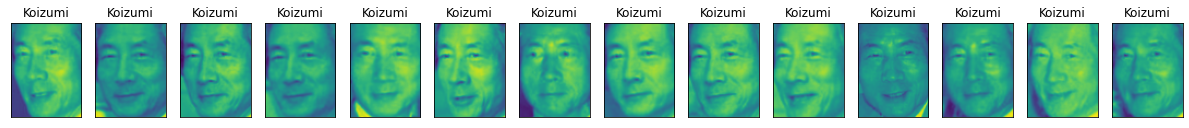

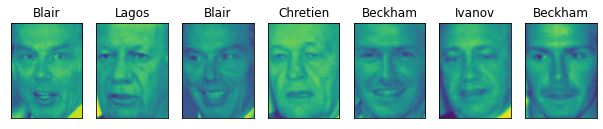

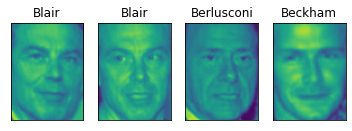

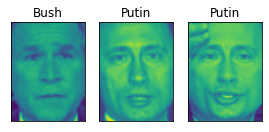

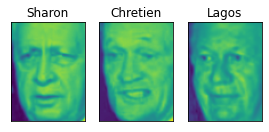

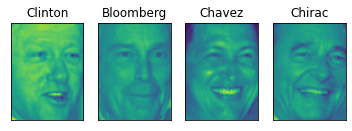

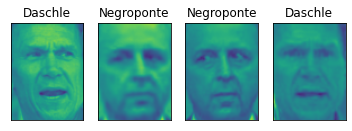

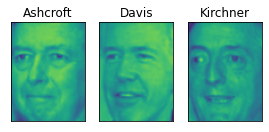

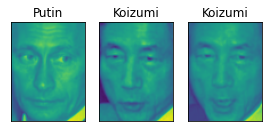

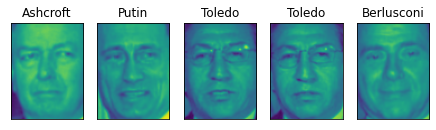

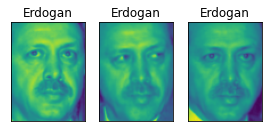

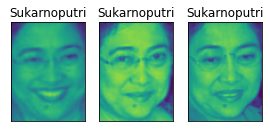

In [32]:
dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X_pca)
for cluster in range(max(labels)+1):
  mask = labels == cluster
  n_images = np.sum(mask)
  fig, axes = plt.subplots(1, n_images, figsize=(n_images*1.5, 4),
                           subplot_kw={'xticks': (), 'yticks': ()})
  for image, label, ax in zip(X_people[mask], y_people[mask], axes):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
    ax.set_title(people.target_names[label].split()[-1])

In [33]:
# k-meansでクラスタを抽出
km = KMeans(n_clusters=10, random_state=0)
labels_km = km.fit_predict(X_pca)
print("Cluster sizes k-means: {}".format(np.bincount(labels_km)))

Cluster sizes k-means: [155 175 238  75 358 257  91 219 323 172]


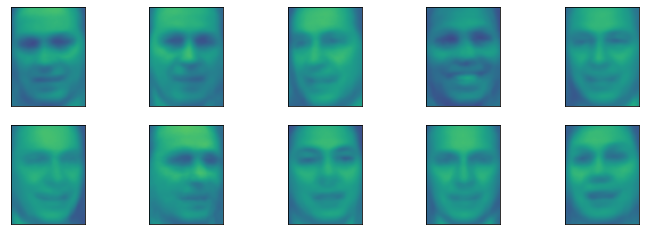

In [34]:
fig, axes = plt.subplots(2, 5, subplot_kw={'xticks': (), 'yticks': ()},
                                           figsize=(12, 4))
for center, ax in zip(km.cluster_centers_, axes.ravel()):
  ax.imshow(pca.inverse_transform(center).reshape(image_shape),
            vmin=0, vmax=1)

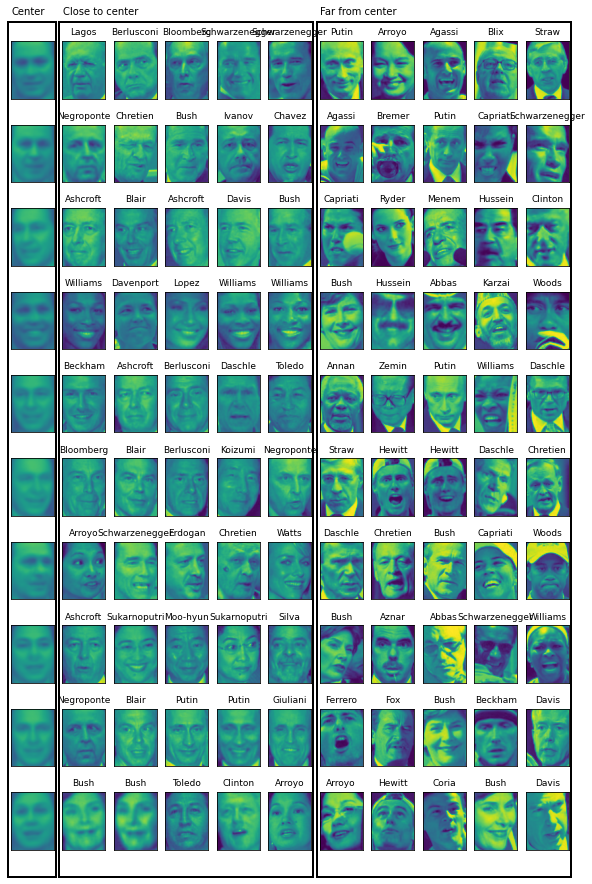

In [35]:
mglearn.plots.plot_kmeans_faces(km, pca, X_pca, X_people, y_people, people.target_names)

In [37]:
# ward凝集型クラスタリングでクラスタを抽出
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X_pca)
print("Cluster sizes agglomerative clustering: {}".format(
    np.bincount(labels_agg)))

Cluster sizes agglomerative clustering: [169 660 144 329 217  85  18 261  31 149]


In [38]:
print("ARI: {:.2f}".format(adjusted_rand_score(labels_agg, labels_km)))

ARI: 0.09


Text(0, 0.5, 'Cluster distance')

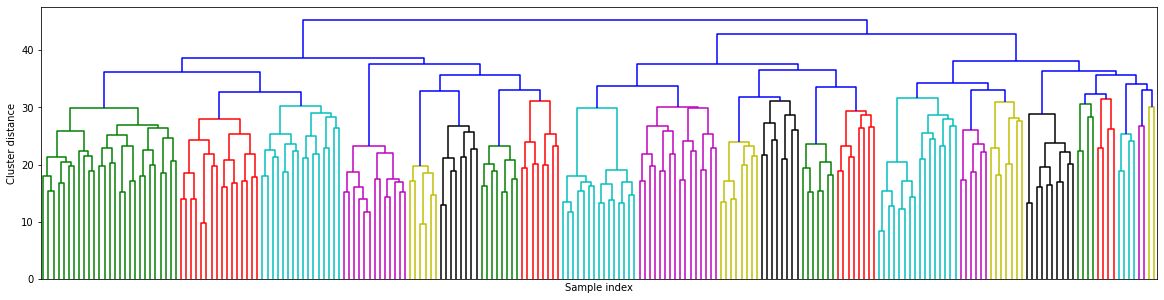

In [39]:
from scipy.cluster.hierarchy import dendrogram, ward
linkage_array = ward(X_pca)
# デンドログラムにプロット
plt.figure(figsize=(20, 5))
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True)
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

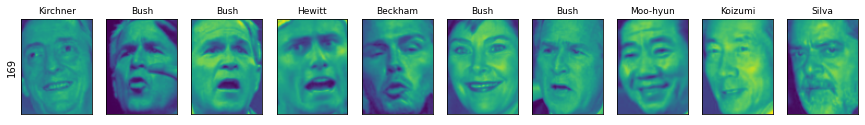

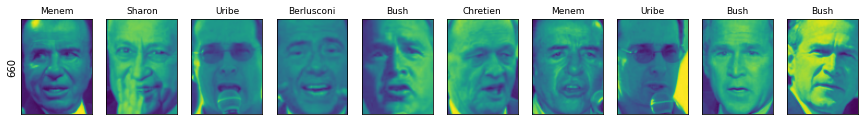

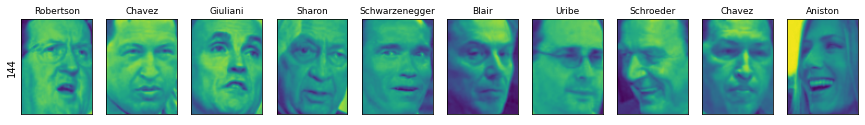

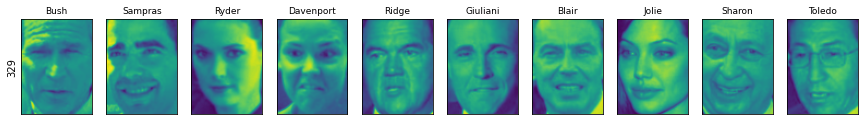

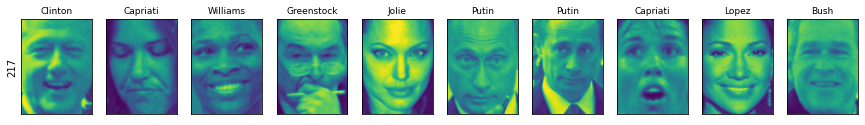

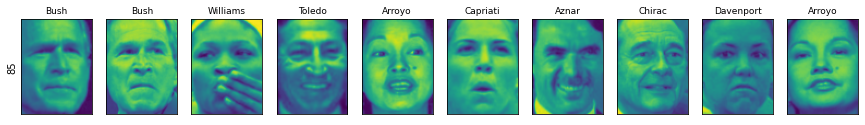

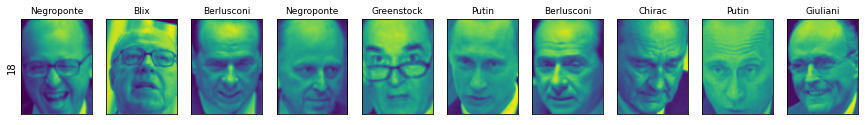

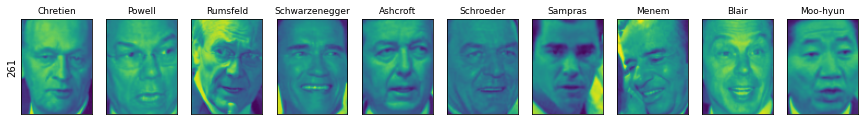

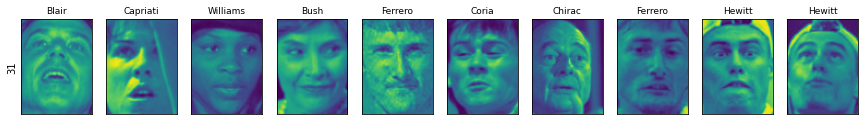

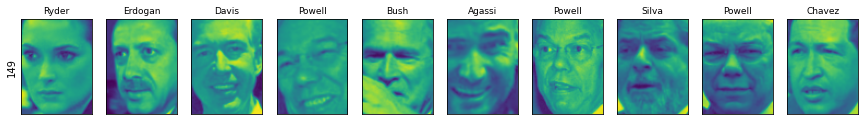

In [40]:
n_clusters = 10
for cluster in range(n_clusters):
  mask = labels_agg == cluster
  fig, axes = plt.subplots(1, 10, subplot_kw={'xticks': (), 'yticks': ()},
                           figsize=(15, 8))
  axes[0].set_ylabel(np.sum(mask))
  for image, label, asdf, ax in zip(X_people[mask], y_people[mask],
                                    labels_agg[mask], axes):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
    ax.set_title(people.target_names[label].split()[-1],
                 fontdict={'fontsize': 9})

Cluster sizes agglomerative clustering: [ 43 120 100 194  56  58 127  22   6  37  65  49  84  18 168  44  47  31
  78  30 166  20  57  14  11  29  23   5   8  84  67  30  57  16  22  12
  29   2  26   8]


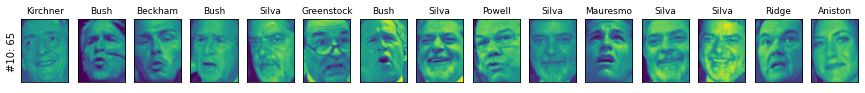

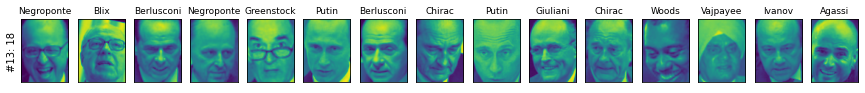

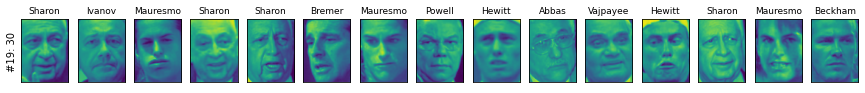

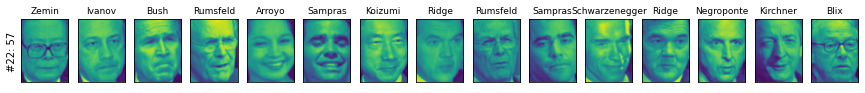

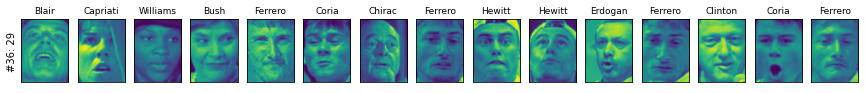

In [43]:
# ward凝集型クラスタリングでクラスタを抽出
agglomerative = AgglomerativeClustering(n_clusters=40)
labels_agg = agglomerative.fit_predict(X_pca)
print("Cluster sizes agglomerative clustering: {}".format(np.bincount(labels_agg)))

n_clusters = 40
for cluster in [10, 13, 19, 22, 36]:
  mask = labels_agg == cluster
  fig, axes = plt.subplots(1, 15, subplot_kw={'xticks': (), 'yticks': ()},
                           figsize=(15, 8))
  cluster_size = np.sum(mask)
  axes[0].set_ylabel("#{}: {}".format(cluster, cluster_size))
  for image, label, asdf, ax, in zip(X_people[mask], y_people[mask],
                                     labels_agg[mask], axes):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
    ax.set_title(people.target_names[label].split()[-1],
                 fontdict={'fontsize': 9})
    for i in range(cluster_size, 15):
      axes[i].set_visible(False)